# Query 3.1
Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled. 

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column. 

>Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial. (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [5]:
import pandas as pd

gold_data = pd.read_csv('GOLD.csv')
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


In [2]:
gold_data.set_index('Date',inplace=True)
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641


In [3]:
gold_without_nan = gold_data.dropna()
gold_without_nan

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


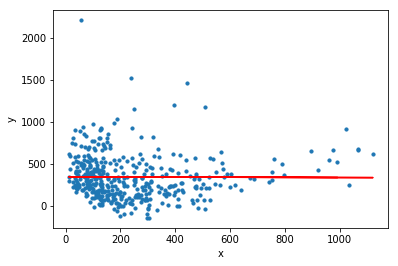

In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

#dataset
y = np.array(gold_without_nan["Pred"])
x = np.array(gold_without_nan["new"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# sckit-learn implementation
# Model initialization

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [6]:
pre_data = gold_data[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (regression_model.predict(pre_data_new))#getting predicted values
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()
gold_data['Pred'] = sata
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,342.168758,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,342.507637,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,342.682017,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,341.872658,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,336.103055,919.376358


Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  1.2291678799353053e-23
R2 score:  1.0


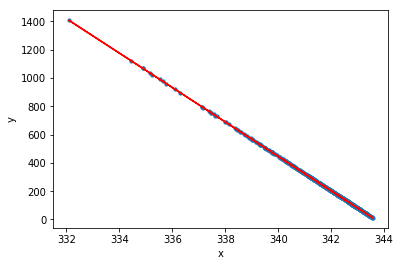

In [7]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset
y = np.array(gold_data["new"])
x = np.array(gold_data["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# sckit-learn implementation
# Model initialization

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

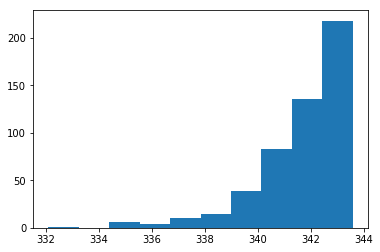

In [8]:
import matplotlib.pyplot as plt

plt.hist(gold_data['Pred'])
plt.show()

C:\Users\a\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


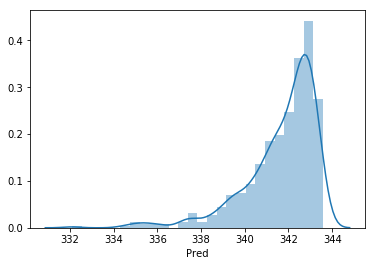

In [9]:
import seaborn as sns
sns.distplot((gold_data['Pred']))

# Query 3.2
Import the stock of your choosing AND the Nifty index. Using linear regression (OLS), calculate - 

>The daily Beta value for the past 3 months. (Daily= Daily returns) 

>The monthly Beta value. (Monthly= Monthly returns) 

Refrain from using the (covariance(x,y)/variance(x)) formula. 

Attempt the question using regression.(Regression Reference) 

Were the Beta values more or less than 1 ? What if it was negative ? 

Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [10]:
tcs_data = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Large_Cap\TCS.csv")
tcs_data['Date'] = pd.to_datetime(tcs_data['Date'])
tcs_data = tcs_data.sort_values('Date')
tcs_data.set_index('Date', inplace=True)
tcs_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,EQ,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,EQ,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,EQ,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,EQ,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
2017-05-22,TCS,EQ,2507.15,2510.00,2553.75,2510.00,2535.00,2531.35,2530.69,831970,2.105461e+09,53261,509741,61.27
2017-05-23,TCS,EQ,2531.35,2533.20,2564.15,2514.00,2523.70,2521.70,2530.49,1374298,3.477645e+09,88749,995551,72.44
2017-05-24,TCS,EQ,2521.70,2534.80,2570.00,2529.65,2567.10,2559.15,2545.01,1267274,3.225228e+09,58716,918505,72.48
2017-05-25,TCS,EQ,2559.15,2577.00,2637.55,2568.00,2615.05,2624.60,2605.40,2047047,5.333377e+09,87147,1180439,57.67


In [11]:
nifty_data = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Nifty50\Nifty50.csv")
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
nifty_data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
2017-05-22,9480.25,9498.65,9427.90,9438.25,202874757,9432.97
2017-05-23,9445.05,9448.05,9370.00,9386.15,231345629,11553.27
2017-05-24,9410.90,9431.90,9341.65,9360.55,218265181,11045.95
2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26


In [12]:
fil_tcs = tcs_data[405:494]
fil_nifty = nifty_data[405:494]

In [13]:
return_tcs = fil_tcs['Close Price'].pct_change()
return_nifty = fil_nifty['Close'].pct_change()

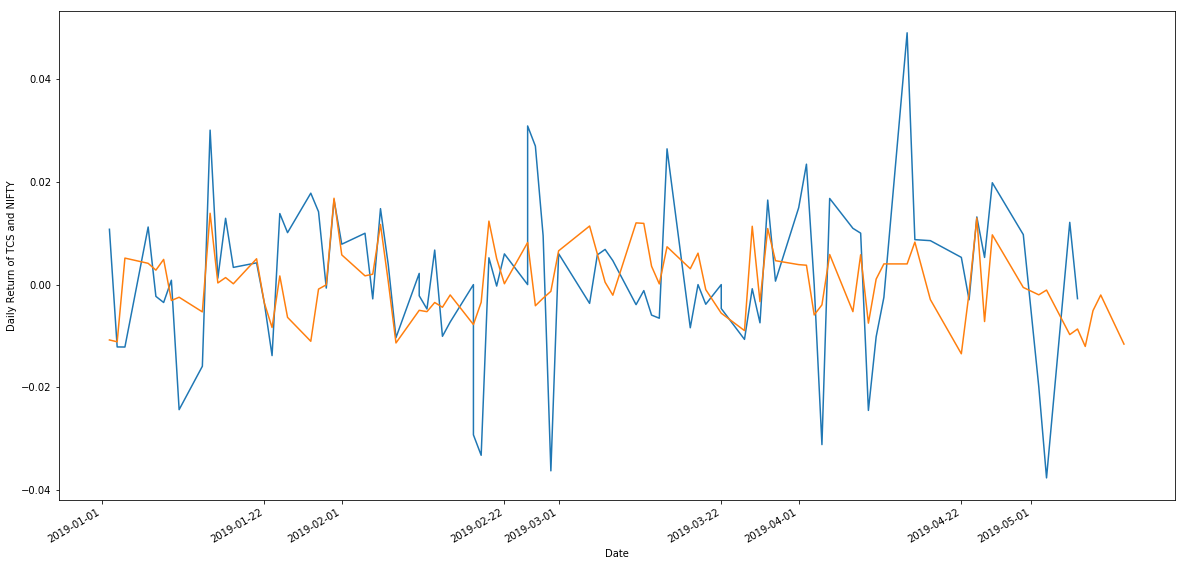

In [14]:
plt.figure(figsize=(20,10))
return_tcs.plot()
return_nifty.plot()
plt.ylabel("Daily Return of TCS and NIFTY")
plt.show()

In [15]:
fil_tcs['pct_change'] = fil_tcs['Close Price'].pct_change()
fil_nifty['pct_change'] = fil_nifty['Close'].pct_change()

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
x = fil_tcs['pct_change'].fillna(0)
y = fil_nifty['pct_change'].fillna(0)
y=list(y)

In [17]:
import pandas as pd 
import statsmodels.api as sm
myModel = sm.OLS(y,x).fit()
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6909
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.408
Time:                        08:29:09   Log-Likelihood:                 317.51
No. Observations:                  89   AIC:                            -633.0
Df Residuals:                      88   BIC:                            -630.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     0.0410      0.049      0.831      0.408      -0.057       0.139
==============================================================================
Omnibus:                        2.580   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.902
Skew:                           0.180   Prob(JB):                        0.386
Kurtosis:                       2.381   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import pandas as pd
import statsmodels.api as sm


# joining the closing prices of the two datasets 
monthly_prices = pd.concat([tcs_data['Close Price'], nifty_data['Close']], axis=1)
monthly_prices.columns = ['TCS', 'NIFTY50']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

                TCS  NIFTY50
Date                        
2017-05-15  2365.10  9445.40
2017-05-16  2429.15  9512.25
2017-05-17  2455.35  9525.75
2017-05-18  2536.20  9429.45
2017-05-19  2507.15  9427.90
                 TCS   NIFTY50
Date                          
2017-05-16  0.027081  0.007078
2017-05-17  0.010786  0.001419
2017-05-18  0.032928 -0.010109
2017-05-19 -0.011454 -0.000164
2017-05-22  0.009652  0.001098


In [19]:
# split dependent and independent variable
X = clean_monthly_returns['TCS']
y = clean_monthly_returns['NIFTY50']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.645
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.200
Time:                        08:34:25   Log-Likelihood:                 1749.7
No. Observations:                 497   AIC:                            -3495.
Df Residuals:                     495   BIC:                            -3487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.103      0.2

In [20]:
#Daily beta value for the past 3 months for the stock
#TCS is 0.0410 which is less than 1 and hence it is
#less volatile than the benchmark

In [21]:
# The monthly beta value for the stock TCS is 0.0153
# which is less than 1 and hence it is less volatile
# than the benchmark